# ggplot - Getting into ggplot

#### Get the Gapminder Data

In [1]:
gapminder.url <- "https://raw.githubusercontent.com/socviz/soc880/master/data/gapminder.csv"
my.data <- read.csv(url(gapminder.url))
dim(my.data)

[1] 1704    6

In [2]:
head(my.data)

country continent year lifeExp      pop gdpPercap
1 Algeria    Africa 1952  43.077  9279525  2449.008
2 Algeria    Africa 1957  45.685 10270856  3013.976
3 Algeria    Africa 1962  48.303 11000948  2550.817
4 Algeria    Africa 1967  51.407 12760499  3246.992
5 Algeria    Africa 1972  54.518 14760787  4182.664
6 Algeria    Africa 1977  58.014 17152804  4910.417

In [3]:
require(ggplot2)

Loading required package: ggplot2


In [4]:
## We'll be a bit more verbose
## to make things clearer
p <- ggplot(data=my.data,
            aes(x=gdpPercap,
                y=lifeExp)) 

* `ggplot` works by building your plot piece by piece
* We start with a clean data frame called `my.data`
* Then we tell `ggplot` what pieces of it we are interested in right now.
* We create an object called p containing this information
* Here, `x=gdpPercap` and `y=lifeExp` say what will go on the `x` and the `y` axes
* These are `aesthetic mappings` that connect `pieces of the data` to `things` we can actually see `on a plot`.



### About aesthetic mappings
* The aes() function links variables to things you will see on the plot.
* The x and y values are the most obvious ones.
* Other aesthetic mappings include, e.g., `color`, `shape`, and `size`.
* These mappings are not directly specifying what specific, e.g., colors or shapes will be on the plot. Rather they say which variables in the data will be represented by, e.g., colors and shapes on the plot.

### Adding layers to the plot

* What happens when you type p at the console and hit return?
* We need to add a layer to the plot.
* This takes the p object we've created, and applies `geom_point()` to it, a function that knows how to take x and y values and plot them in a scatterplot.

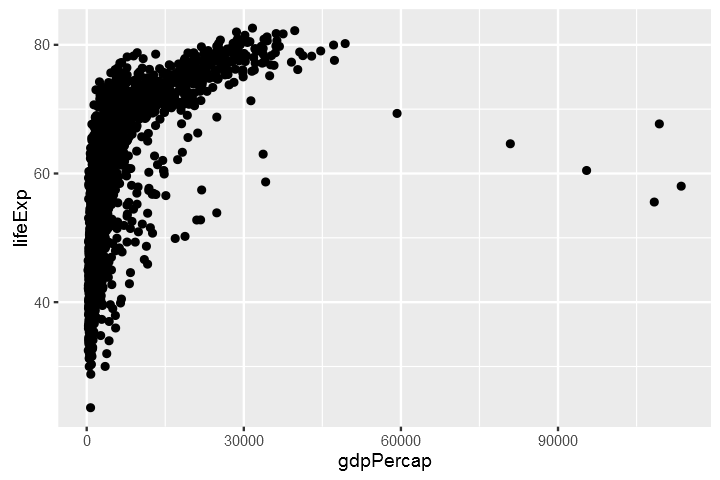

In [6]:
options(repr.plot.width = 6, repr.plot.height = 4)
p + geom_point()

### The Plot-Making Process

0. Start with your data in the right shape

1. Tell ggplot what relationships you want to see

2. Tell ggplot how you want to see them

3. Layer these pictures as needed

4. Fine-tune scales, labels, tick marks, etc

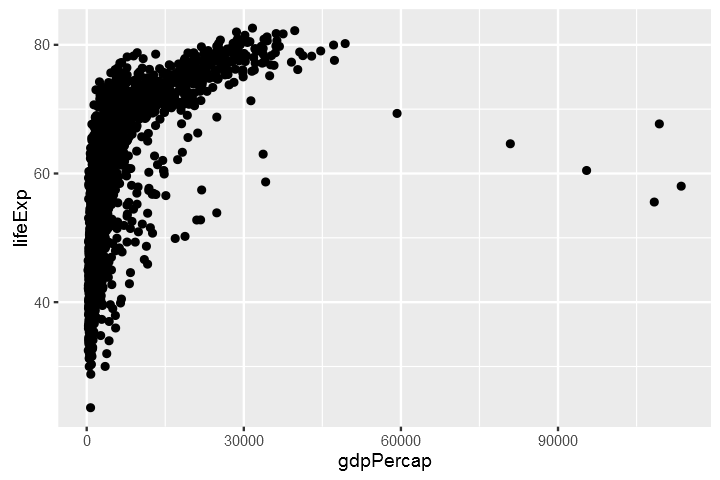

In [7]:
p <- ggplot(my.data,
            aes(x=gdpPercap, y=lifeExp))

p + geom_point()

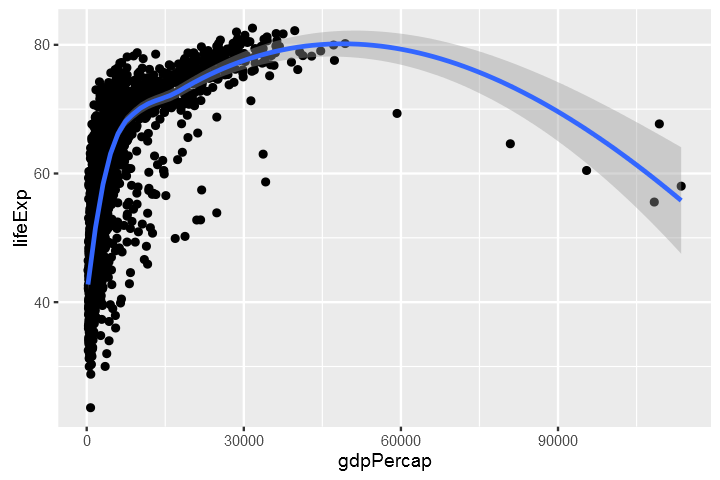

In [8]:
p + geom_point() +
    geom_smooth(method="loess") 

* What happens when you put geom_smooth() first instead of second?
* Notice how both geom_point and geom_smooth() inherit the information in p about what the x and y variables are.

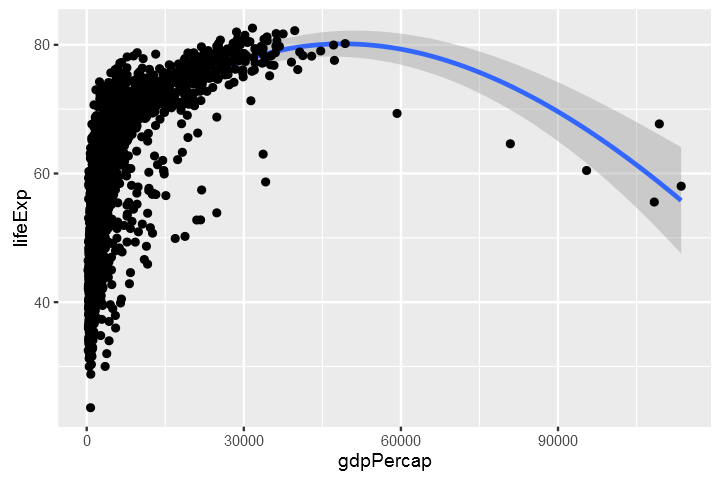

In [9]:
p + geom_smooth(method="loess") + geom_point() 

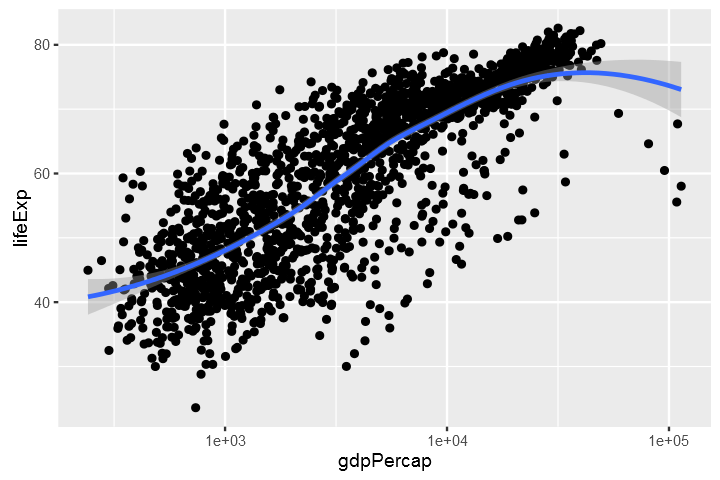

In [10]:
p + geom_point() +
    geom_smooth(method="loess") +
    scale_x_log10()

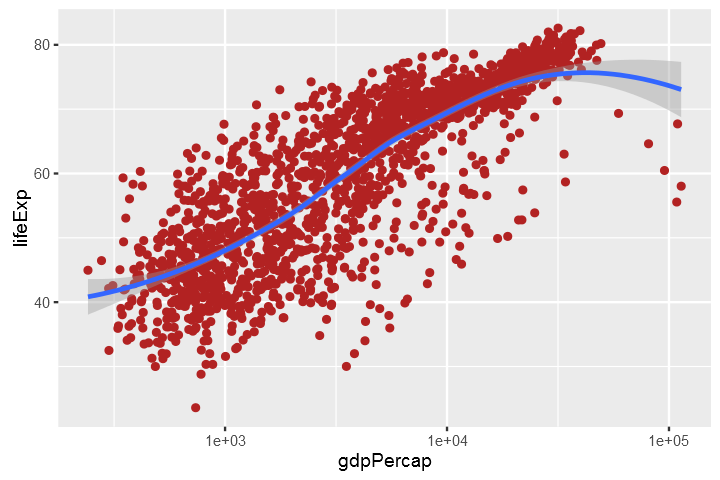

In [11]:
p + geom_point(color="firebrick") +
    geom_smooth(method="loess") +
    scale_x_log10()

* **Setting** an aesthetic has no relationship to the data. In the previous plot, the color red is not representing or **mapping** any feature of the data.
* To see the difference between **setting** and **mapping** an aesthetic, let's go back to our p object and recreate it.
* This time, in addition to x and y we tell ggplot to map the variable Continent to the color aesthetic.

In [12]:
p <- ggplot(my.data,
            aes(x=gdpPercap,
                y=lifeExp,
                color=continent))

* Now there is a relationship or mapping between the data and the aesthetic.
* The values of the variable continent will be represented by colors on the figure we draw.

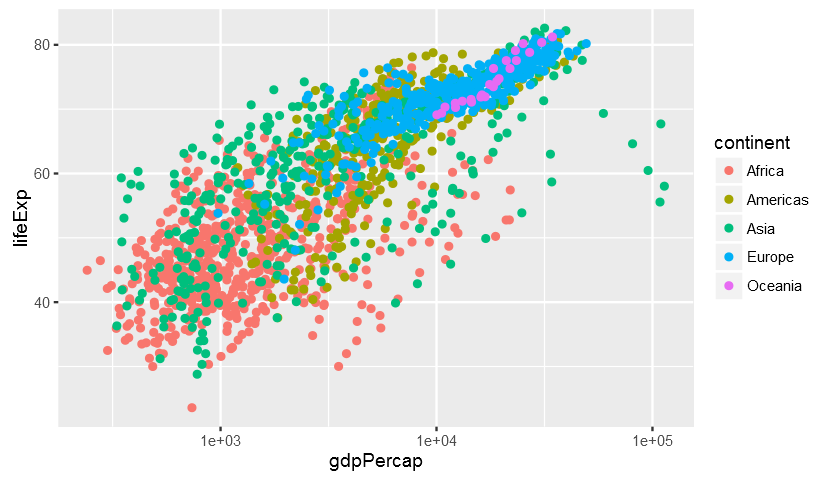

In [15]:
options(repr.plot.width = 7, repr.plot.height = 4)
p + geom_point() +
    scale_x_log10()

### Colorless green ideas sleep furiously
* ggplot implements a "grammar" of graphics, an idea developed by Leland Wilkinson (2005).
* The grammar gives you rules for how to map pieces of data to geometric objects (like points and lines) with attributes (like color and size), together with further rules for transforming the data if needed, adjusting scales, or projecting the results onto a coordinate system.
* A key point is that, like other rules of syntax, it limits what you can say but doesn't make what you say sensible or meaningful.
* It allows you to produce "sentences" (mappings of data to objects) but they can easily be garbled.

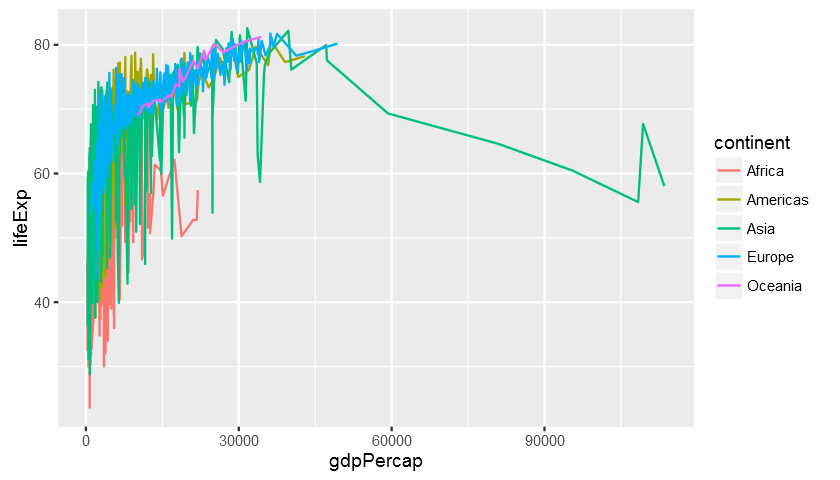

In [16]:
p + geom_line()

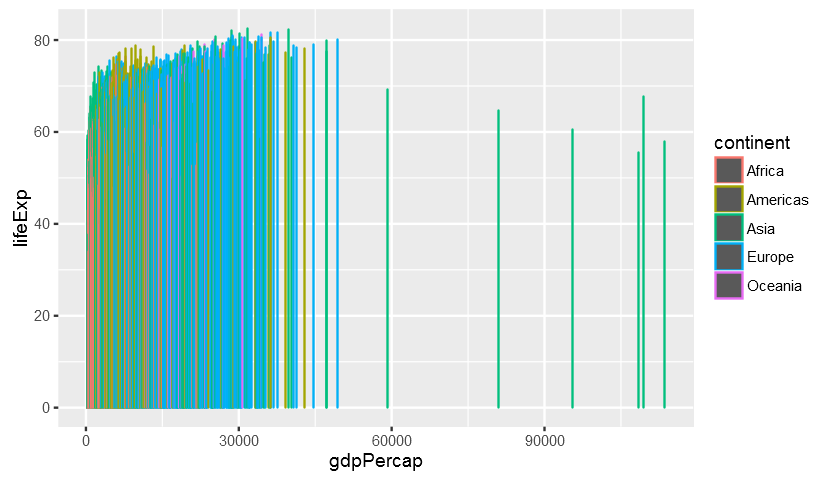

In [17]:
p + geom_bar(stat="identity")

### Once you get used to it, this layered grammar lets you build up sophisticated plots

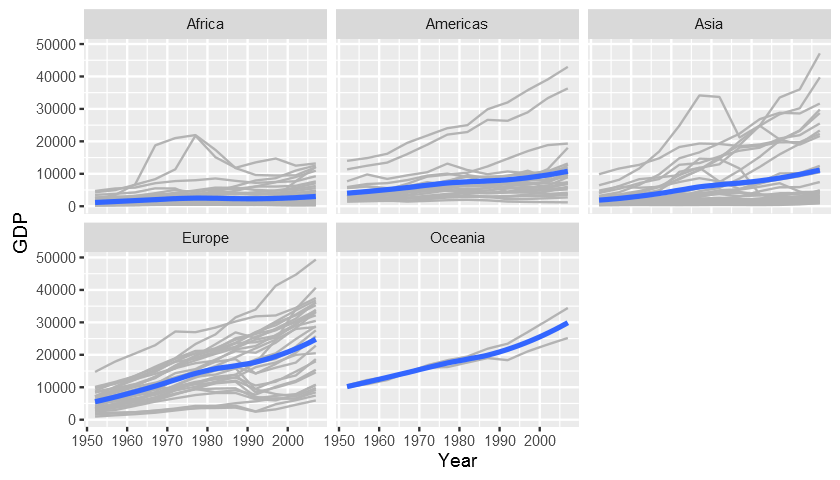

In [18]:
## "Not in" convenience operator
"%nin%" <- function(x, y) {
  return( !(x %in% y) )
}

p <- ggplot(subset(my.data, country %nin% "Kuwait"), aes(x=year, y=gdpPercap))

p1 <- p + geom_line(color="gray70", aes(group=country)) +
    geom_smooth(size=1.1, method="loess", se=FALSE)

p1 + facet_wrap(~ continent) + labs(x="Year", y="GDP")

* To see the logic of each step of a plot, peel the layers backwards from the last one to the first, and see which parts of the plot are changed, or disappear.
* Also examine what happens if you change some of the arguments, e.g. se=TRUE, or method='lm', or what happens when you leave them at their defaults.

### References 
http://socviz.github.io/soc880/week-02/index.html